<a href="https://colab.research.google.com/github/DilshodbekMX/GoogleColab/blob/main/PyTorch_Workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from torch import nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

print(torch.__version__)

2.0.1+cu118


In [2]:
weight = 0.7
bias = 0.3

start = 0
end = 2
step = 0.02
X = torch.arange(start,end,step).unsqueeze(dim=1)
y = weight * X + bias


In [3]:
train_split = int(0.8*len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(80, 80, 20, 20)

In [4]:
def plot_prediction(train_data=X_train, train_label=y_train, test_data=X_test, test_label=y_test, predictions=None):
  plt.figure(figsize=(5,3))

  plt.scatter(train_data,train_label, c='b', s=1,label="Training Data")
  plt.scatter(test_data,test_label, c='g', s=1, label="Testing Data")

  if predictions is not None:
    plt.scatter(test_data,predictions, c='r',s=1, label="Predictions")

  plt.legend(prop={"size":5});


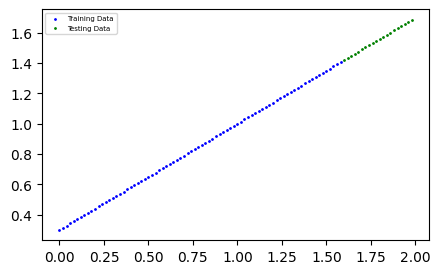

In [5]:
plot_prediction(X_train, y_train,X_test, y_test)

In [6]:
class  LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()

    self.weights = nn.Parameter(torch.randn(1,dtype=torch.float,requires_grad=True))
    self.bias = nn.Parameter(torch.randn(1,dtype=torch.float,requires_grad=True))

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias



In [7]:
torch.manual_seed(42)
model_0 = LinearRegressionModel()
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [8]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [9]:
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.6675],
        [0.6742],
        [0.6810],
        [0.6877],
        [0.6944],
        [0.7012],
        [0.7079],
        [0.7147],
        [0.7214],
        [0.7281],
        [0.7349],
        [0.7416],
        [0.7483],
        [0.7551],
        [0.7618],
        [0.7685],
        [0.7753],
        [0.7820],
        [0.7887],
        [0.7955]])

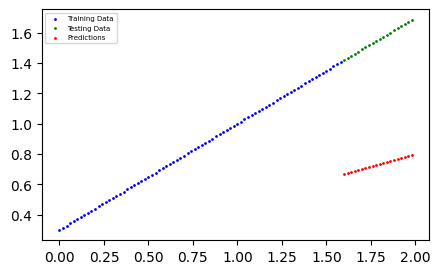

In [10]:
plot_prediction(predictions=y_preds)

In [11]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.Adam(params=model_0.parameters(),lr=0.01)
epoch_count = []
loss_values = []
test_loss_values = []
epochs = 200

for epoch in range(epochs):
  model_0.train()
  y_pred = model_0(X_train)
  loss = loss_fn(y_pred,y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  model_0.eval()

  with torch.inference_mode():
    test_pred = model_0(X_test)
    test_loss = loss_fn(test_pred, y_test)
  if epoch%10 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Epoch: {epoch} | MAE train loss: {loss} | MAE test loss: {test_loss}")
    print(model_0.state_dict(),"\n")


Epoch: 0 | MAE train loss: 0.4582051634788513 | MAE test loss: 0.7936148047447205
OrderedDict([('weights', tensor([0.3467])), ('bias', tensor([0.1388]))]) 

Epoch: 10 | MAE train loss: 0.27920523285865784 | MAE test loss: 0.5146149396896362
OrderedDict([('weights', tensor([0.4467])), ('bias', tensor([0.2388]))]) 

Epoch: 20 | MAE train loss: 0.1039019376039505 | MAE test loss: 0.2361360490322113
OrderedDict([('weights', tensor([0.5467])), ('bias', tensor([0.3383]))]) 

Epoch: 30 | MAE train loss: 0.04908657819032669 | MAE test loss: 0.011708348989486694
OrderedDict([('weights', tensor([0.6333])), ('bias', tensor([0.4078]))]) 

Epoch: 40 | MAE train loss: 0.034265704452991486 | MAE test loss: 0.06179021671414375
OrderedDict([('weights', tensor([0.6227])), ('bias', tensor([0.3767]))]) 

Epoch: 50 | MAE train loss: 0.030773380771279335 | MAE test loss: 0.08060064911842346
OrderedDict([('weights', tensor([0.6298])), ('bias', tensor([0.3450]))]) 

Epoch: 60 | MAE train loss: 0.0166330151259

In [12]:
epoch_count, loss_values,test_loss_values

([0,
  10,
  20,
  30,
  40,
  50,
  60,
  70,
  80,
  90,
  100,
  110,
  120,
  130,
  140,
  150,
  160,
  170,
  180,
  190],
 [tensor(0.4582, grad_fn=<MeanBackward0>),
  tensor(0.2792, grad_fn=<MeanBackward0>),
  tensor(0.1039, grad_fn=<MeanBackward0>),
  tensor(0.0491, grad_fn=<MeanBackward0>),
  tensor(0.0343, grad_fn=<MeanBackward0>),
  tensor(0.0308, grad_fn=<MeanBackward0>),
  tensor(0.0166, grad_fn=<MeanBackward0>),
  tensor(0.0035, grad_fn=<MeanBackward0>),
  tensor(0.0045, grad_fn=<MeanBackward0>),
  tensor(0.0019, grad_fn=<MeanBackward0>),
  tensor(0.0008, grad_fn=<MeanBackward0>),
  tensor(0.0029, grad_fn=<MeanBackward0>),
  tensor(0.0029, grad_fn=<MeanBackward0>),
  tensor(0.0007, grad_fn=<MeanBackward0>),
  tensor(0.0047, grad_fn=<MeanBackward0>),
  tensor(0.0041, grad_fn=<MeanBackward0>),
  tensor(0.0014, grad_fn=<MeanBackward0>),
  tensor(0.0010, grad_fn=<MeanBackward0>),
  tensor(0.0002, grad_fn=<MeanBackward0>),
  tensor(0.0012, grad_fn=<MeanBackward0>)],
 [tensor(

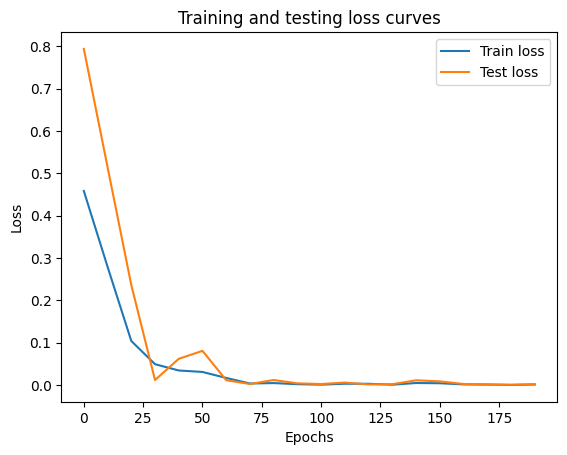

In [13]:
import numpy as np

plt.plot(epoch_count,np.array(torch.tensor(loss_values).cpu().numpy()),label="Train loss")
plt.plot(epoch_count,test_loss_values,label="Test loss")
plt.title("Training and testing loss curves")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [14]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.7003])), ('bias', tensor([0.2986]))])

Adamax: OrderedDict([('weights', tensor([0.7006])), ('bias', tensor([0.3010]))])

Adamw:  OrderedDict([('weights', tensor([0.6974])), ('bias', tensor([0.2997]))])

Adam:   OrderedDict([('weights', tensor([0.7004])), ('bias', tensor([0.3002]))])

SGD:    OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [15]:
with torch.inference_mode():
  y_pred_new = model_0(X_test)
model_0.state_dict()

OrderedDict([('weights', tensor([0.7003])), ('bias', tensor([0.2986]))])

In [16]:
weight, bias

(0.7, 0.3)

(None, None)

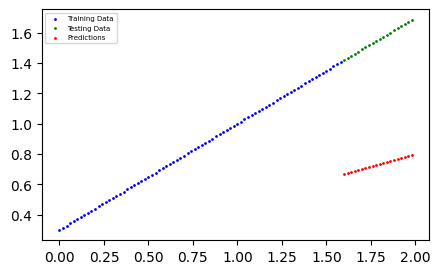

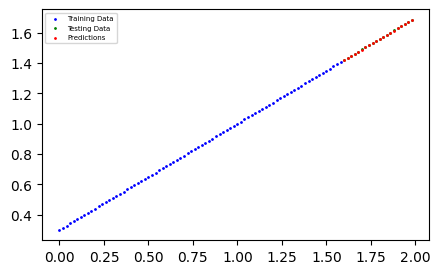

In [17]:
plot_prediction(predictions=y_preds), plot_prediction(predictions=y_pred_new)

In [18]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True,exist_ok=True)

MODEL_NAME = "pytorch_workflow_model.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME
print(F"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),f=MODEL_SAVE_PATH)

Saving model to: models/pytorch_workflow_model.pth


In [19]:
!ls -l models

total 4
-rw-r--r-- 1 root root 1187 Aug 16 13:36 pytorch_workflow_model.pth


In [20]:
loaded_model_0 =LinearRegressionModel()
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [21]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.7003])), ('bias', tensor([0.2986]))])

In [22]:
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_0_preds = loaded_model_0(X_test)
loaded_model_0_preds

tensor([[1.4190],
        [1.4330],
        [1.4470],
        [1.4611],
        [1.4751],
        [1.4891],
        [1.5031],
        [1.5171],
        [1.5311],
        [1.5451],
        [1.5591],
        [1.5731],
        [1.5871],
        [1.6011],
        [1.6151],
        [1.6291],
        [1.6431],
        [1.6571],
        [1.6711],
        [1.6851]])

In [23]:
loaded_model_0.eval()
with torch.inference_mode():
  y_preds = model_0(X_test)
y_preds

tensor([[1.4190],
        [1.4330],
        [1.4470],
        [1.4611],
        [1.4751],
        [1.4891],
        [1.5031],
        [1.5171],
        [1.5311],
        [1.5451],
        [1.5591],
        [1.5731],
        [1.5871],
        [1.6011],
        [1.6151],
        [1.6291],
        [1.6431],
        [1.6571],
        [1.6711],
        [1.6851]])

In [24]:
y_preds == loaded_model_0_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

In [25]:
import torch
import matplotlib.pyplot as plt
from torch import nn

device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cuda


In [26]:
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02
X = torch.arange(start,end,step).unsqueeze(dim=1)
y = weight * X + bias

train_split = int(0.8*len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [27]:
def plot_prediction(train_data=X_train, train_label=y_train, test_data=X_test, test_label=y_test, predictions=None):
  plt.figure(figsize=(5,3))

  plt.scatter(train_data,train_label, c='b', s=1,label="Training Data")
  plt.scatter(test_data,test_label, c='g', s=1, label="Testing Data")

  if predictions is not None:
    plt.scatter(test_data,predictions, c='r',s=1, label="Predictions")

  plt.legend(prop={"size":5});

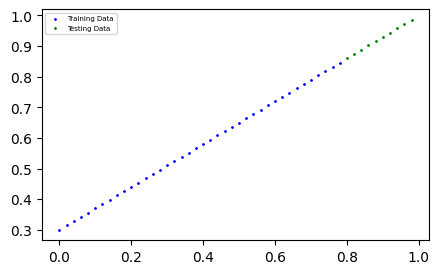

In [28]:
plot_prediction(X_train, y_train,X_test, y_test)

In [29]:
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()

    self.linear_layer = nn.Linear(in_features=1,out_features=1)

  def forward(self, x: torch.Tensor) ->torch.Tensor:
    return self.linear_layer(x)

torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [30]:
X_train[:5], y_train[:5]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560]]))

In [31]:
next(model_1.parameters()).device

device(type='cpu')

In [32]:
model_1.to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

In [33]:
loss_fn = nn.L1Loss()

optimizer = torch.optim.SGD(params=model_1.parameters(),lr=0.01,)

In [34]:
torch.manual_seed(42)
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

epochs = 200


for epoch in range(epochs):
  model_1.train()
  y_pred = model_1(X_train)
  loss = loss_fn(y_pred, y_train)

  optimizer.zero_grad()

  loss.backward()
  optimizer.step()

  model_1.eval()
  with torch.inference_mode():
    test_pred = model_1(X_test)
    test_loss = loss_fn(test_pred,y_test)

  if(epoch%10 == 0):
    print(f"Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}")

Epoch: 0 | Loss: 0.5551779866218567 | Test Loss: 0.5739762187004089
Epoch: 10 | Loss: 0.439968079328537 | Test Loss: 0.4392664134502411
Epoch: 20 | Loss: 0.3247582018375397 | Test Loss: 0.30455657839775085
Epoch: 30 | Loss: 0.20954833924770355 | Test Loss: 0.16984669864177704
Epoch: 40 | Loss: 0.09433845430612564 | Test Loss: 0.03513690456748009
Epoch: 50 | Loss: 0.023886388167738914 | Test Loss: 0.04784907028079033
Epoch: 60 | Loss: 0.019956795498728752 | Test Loss: 0.045803118497133255
Epoch: 70 | Loss: 0.016517987474799156 | Test Loss: 0.037530567497015
Epoch: 80 | Loss: 0.013089174404740334 | Test Loss: 0.02994490973651409
Epoch: 90 | Loss: 0.009653178043663502 | Test Loss: 0.02167237363755703
Epoch: 100 | Loss: 0.006215683650225401 | Test Loss: 0.014086711220443249
Epoch: 110 | Loss: 0.00278724217787385 | Test Loss: 0.005814164876937866
Epoch: 120 | Loss: 0.0012645035749301314 | Test Loss: 0.013801801018416882
Epoch: 130 | Loss: 0.0012645035749301314 | Test Loss: 0.013801801018416

In [35]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

In [36]:
model_1.eval()

with torch.inference_mode():
  y_preds = model_1(X_test)
y_preds

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]], device='cuda:0')

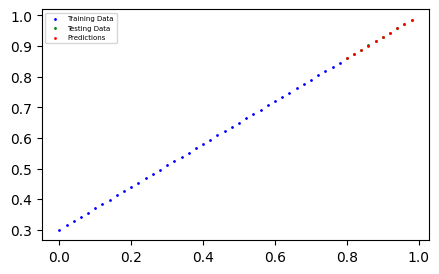

In [37]:
plot_prediction(predictions=y_preds.cpu())

In [41]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True,exist_ok=True)

MODEL_NAME = "pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME
print(F"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(),f=MODEL_SAVE_PATH)

Saving model to: models/pytorch_workflow_model_1.pth


In [42]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

In [45]:
loaded_model_1 =LinearRegressionModelV2()
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))
loaded_model_1.to(device)

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [46]:
next(loaded_model_1.parameters()).device

device(type='cuda', index=0)

In [47]:
loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

In [48]:
loaded_model_1.eval()
with torch.inference_mode():
  loaded_model_1_preds = loaded_model_1(X_test)
loaded_model_1_preds == loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')